In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import helper_functions as functions
import importlib
importlib.reload(functions)

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [15]:
dtypes = {3: 'object', 4: 'object', 5: 'object'}
df = pd.read_csv('asteroids/data/asteroid-dataset/dataset.csv', dtype=dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [7]:
df['pha'].value_counts()

pha
N    936537
Y      2066
Name: count, dtype: int64

## How Large are the Potentially Hazardous Asteroids?
By using the Pandas query() method we can query the dataframe and display the data in a histogram plot. It shows the frequency in the y axis and the diameter in the x axis. You can also see the lines that mark the mean and the standard deviation.

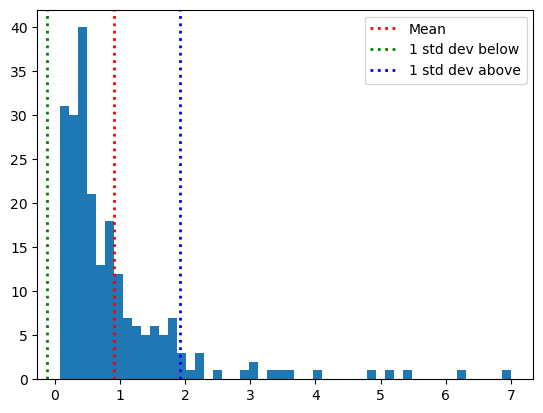

In [19]:
functions.plot_hist_with_mean_std(df_pha, 'diameter')

## How Bright are the Potentially Hazardous Asteroids?
H (Absolute magnitude parameter): This is a measure of the asteroid’s brightness, which can give some indication of its size, and by extension, its potential to cause damage.

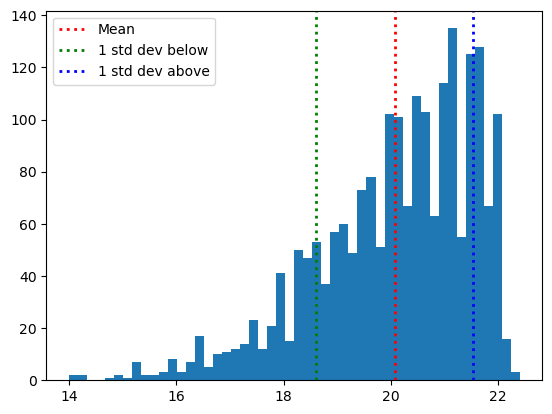

In [21]:
functions.plot_hist_with_mean_std(df_pha, 'H')

## What is the closest they get to Earth?
moid_ld (Earth Minimum Orbit Intersection Distance): This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

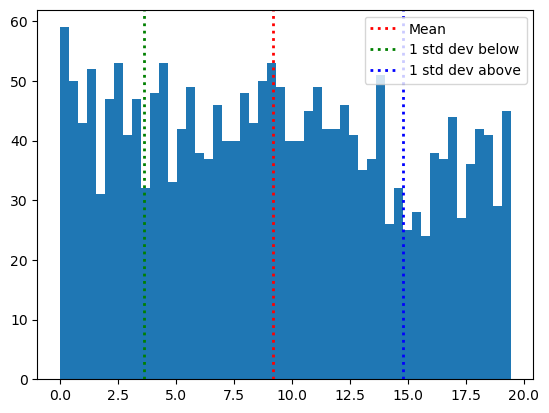

In [22]:
functions.plot_hist_with_mean_std(df_pha, 'moid_ld')

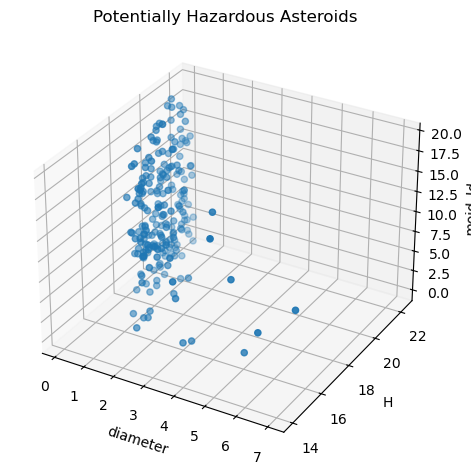

In [23]:
ax = plt.axes(projection = '3d')
ax.scatter3D(df_pha['diameter'], df_pha['H'], df_pha['moid_ld'])
ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout();

In [33]:
# Create a new DataFrame without missing values
features = df_pha[['diameter', 'H', 'moid_ld']].dropna()

# Fit the model to your data
kmeans.fit(features)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Add the cluster labels to your DataFrame
features['cluster'] = labels

/home/elmunoz42/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


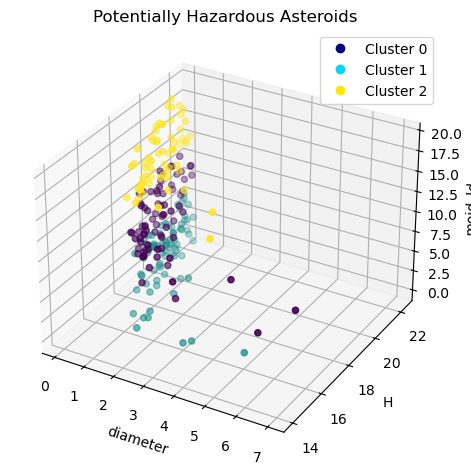

In [37]:
ax = plt.axes(projection = '3d')

# Create a scatter plot
scatter = ax.scatter3D(features['diameter'], features['H'], features['moid_ld'], c=features['cluster'])

ax.set_xlabel('diameter')
ax.set_ylabel('H')
ax.set_zlabel('moid_ld')

# Get the unique cluster labels
clusters = np.unique(features['cluster'])

# Create a legend entry for each cluster
for cluster in clusters:
    ax.plot([], [], 'o', color=plt.cm.jet(cluster / len(clusters)), label=f'Cluster {cluster}')

plt.legend()
plt.title('Potentially Hazardous Asteroids')
plt.tight_layout()
plt.show()

## How Large are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

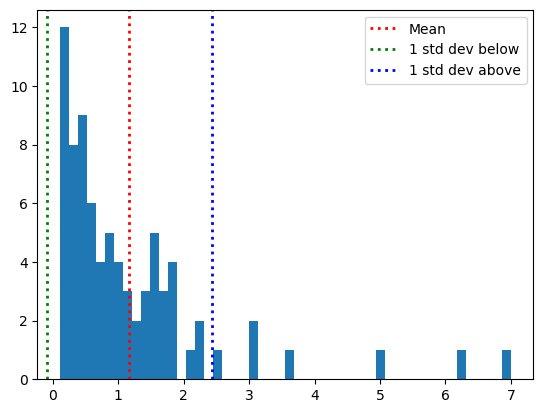

In [39]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')

## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.

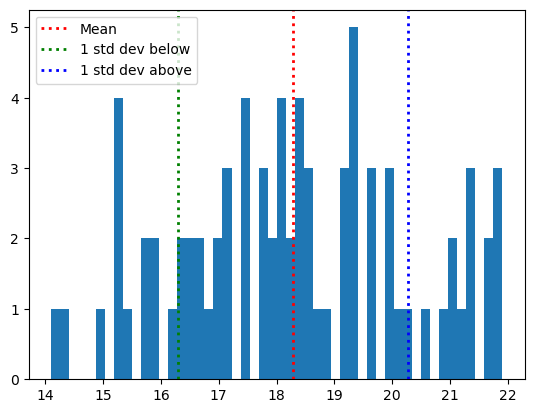

In [40]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')

## How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the  feature of the 0 group from the above K-Means cluster plot.

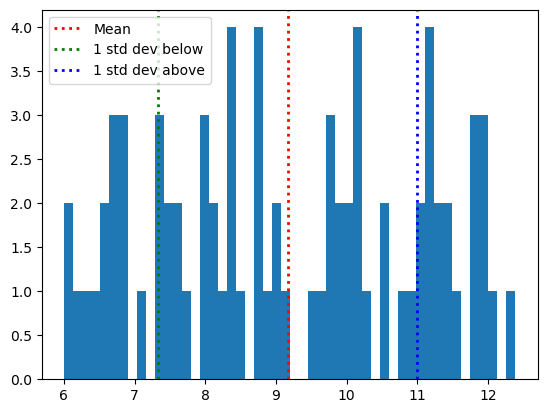

In [41]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

## SUMMARY


We’ve been conducting an exploratory data analysis on a dataset of asteroids, specifically focusing on those that are potentially hazardous (PHAs). We’ve used K-Means clustering to group similar asteroids together based on their features.

K-Means Clustering: We performed K-Means clustering on the dataset using three features: ‘diameter’, ‘H’ (absolute magnitude parameter), and ‘moid_ld’ (Earth Minimum Orbit Intersection Distance). The clustering process grouped similar asteroids together, forming several clusters.

Cluster Selection: After clustering, we chose to focus on the asteroids in Cluster 0 for further analysis.

Feature Analysis: For the asteroids in Cluster 0, we analyzed three features:

Diameter: We plotted a histogram of the diameters of the asteroids in Cluster 0, showing the distribution of their sizes. This gave us an idea of how large these potentially hazardous asteroids are.

H (Absolute Magnitude Parameter): We plotted a histogram of the absolute magnitude parameter of the asteroids in Cluster 0. This parameter is a measure of the asteroid’s brightness, which can give some indication of its size.

moid_ld (Earth Minimum Orbit Intersection Distance): We plotted a histogram of the Earth Minimum Orbit Intersection Distance of the asteroids in Cluster 0. This is a measure of how close the asteroid’s orbit comes to Earth’s orbit. Asteroids with smaller MOID values come closer to Earth and could potentially be classified as PHAs.

Through this process, we’ve gained insights into the characteristics of potentially hazardous asteroids in Cluster 0. This can help us understand what makes an asteroid potentially hazardous and inform future efforts to detect and track PHAs.

How Large are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the diameter feature of the 0 group from the above K-Means cluster plot.

[39]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'diameter')
## How Bright are the Potentially Hazardous Asteroids in Cluster 0?
Based on the clustering we'll look at the H feature of the 0 group from the above K-Means cluster plot.
[40]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'H')
How Close to Earth are the Potentially Hazardous Asteroids in Cluster 0?

Based on the clustering we'll look at the feature of the 0 group from the above K-Means cluster plot.

[41]:
functions.plot_hist_with_mean_std(features.query('cluster == 0'), 'moid_ld')

It's a very interesting process to actually, draw patterns from these real data points.